# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [29]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"\nNumber of unique mice: {num_mice}")


Number of unique mice: 249


In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
print(f"\nNumber of duplicate entries: {len(duplicates)}")



Number of duplicate entries: 5


In [31]:
# Optional: Get all the data for the duplicate mouse ID.
if len(duplicates) > 0:
    duplicate_mouse_id = duplicates["Mouse ID"].iloc[0]
    print(f"\nData for the duplicate mouse (ID: {duplicate_mouse_id}):")
    print(combined_data[combined_data["Mouse ID"] == duplicate_mouse_id])


Data for the duplicate mouse (ID: g989):
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [33]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print(f"\nNumber of unique mice in clean data: {num_mice_clean}")


Number of unique mice in clean data: 249


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean",
    "median",
    "var",
    "std",
    "sem"
])

print(summary_stats)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print(summary_stats_advanced)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

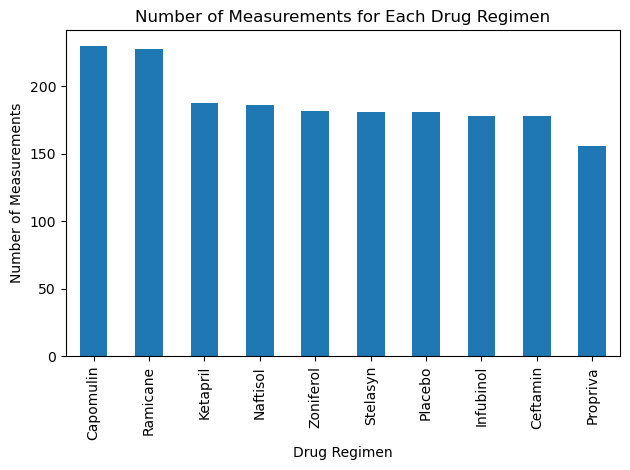

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.title("Number of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

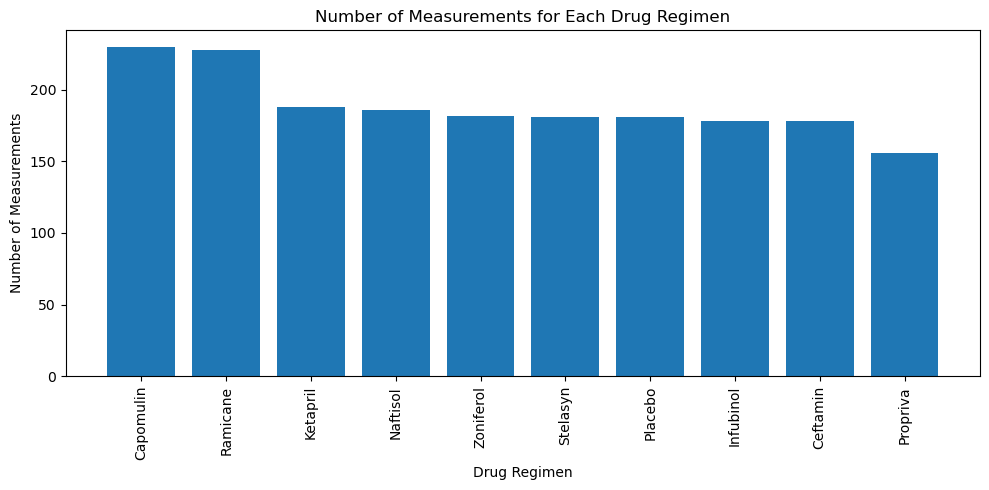

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Number of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

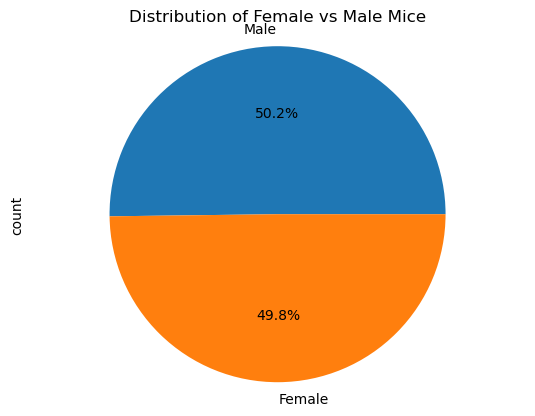

In [39]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_data.groupby("Mouse ID")["Sex"].first()
gender_counts = mice_gender.value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

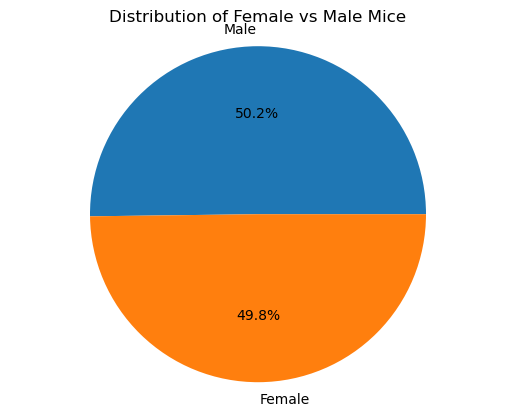

In [40]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_data.groupby("Mouse ID")["Sex"].first()
gender_counts = mice_gender.value_counts()

# Make the pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"])

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_treatments = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(treatments)]

print(final_tumor_vol_treatments[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']].sort_values('Drug Regimen'))

    Mouse ID Drug Regimen  Tumor Volume (mm3)
116     l897    Capomulin           38.846876
86      j119    Capomulin           38.125164
88      j246    Capomulin           38.753265
193     u364    Capomulin           31.023923
66      g316    Capomulin           40.159220
..       ...          ...                 ...
92      j913     Ramicane           31.560470
94      j989     Ramicane           36.134852
97      k403     Ramicane           22.050126
120     m546     Ramicane           30.564625
70      g791     Ramicane           29.128472

[100 rows x 3 columns]


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]


    # add subset
    tumor_vol_data.append(subset)


    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"\nAnalysis for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    if outliers.empty:
        print("No potential outliers found.")
    else:
        print("Potential outliers:")
        print(outliers)
    
    print(f"Summary statistics for {treatment}:")
    print(subset.describe())
    print("\n" + "="*50 + "\n")


Analysis for Capomulin:
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
No potential outliers found.
Summary statistics for Capomulin:
count    25.000000
mean     36.667568
std       5.715188
min      23.343598
25%      32.377357
50%      38.125164
75%      40.159220
max      47.685963
Name: Tumor Volume (mm3), dtype: float64



Analysis for Ramicane:
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
No potential outliers found.
Summary statistics for Ramicane:
count    25.000000
mean     36.191390
std       5.671539
min      22.050126
25%      31.560470
50%      36.561652
75%      40.659006
max      45.220869
Name: Tumor Volume (mm3), dtype: float64



Analysis for Infubinol:
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Summary statistics for Infubinol:
count    25.000000
mean     58.178246
std       8.60295

/var/folders/8g/qxn4mxfs0m13n_9yj63sttfw0000gn/T/ipykernel_14974/1061452487.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments)


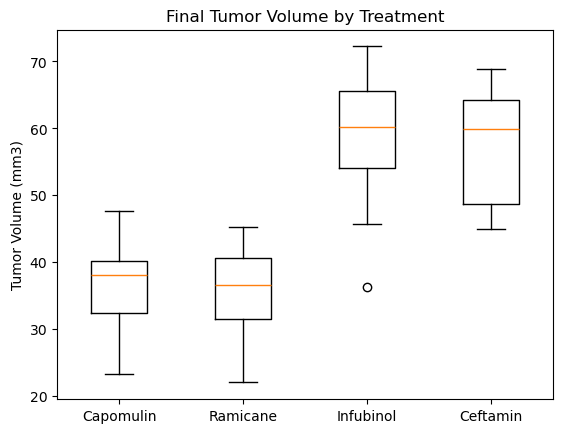

In [43]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

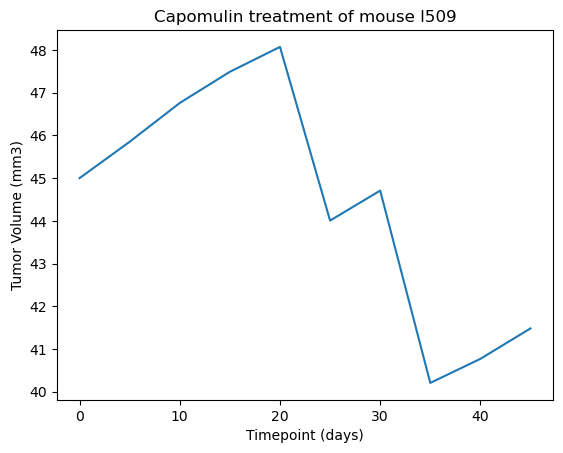

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_capomulin = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin)')

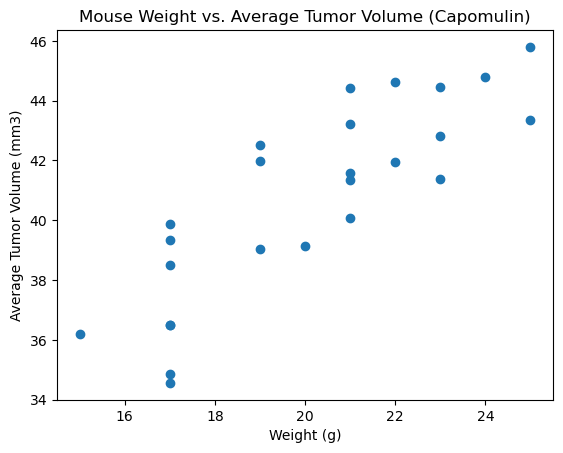

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")


## Correlation and Regression


Correlation between mouse weight and average tumor volume: 0.84
R-squared value: 0.71


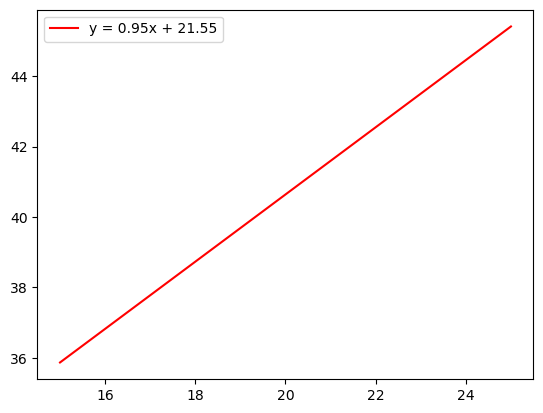

In [47]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

print(f"\nCorrelation between mouse weight and average tumor volume: {correlation[0]:.2f}")
print(f"R-squared value: {r_value**2:.2f}")

x = np.array([min(mouse_weight), max(mouse_weight)])
y = slope * x + intercept

plt.plot(x, y, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.show()
